In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

In [2]:
# Set random seed for reproducibility
random_state = 42
dangerous_point = np.array([[-4, 4]])
# Generate data using make_blobs
X, y = make_blobs(n_samples=100, centers=2, cluster_std=1.0, random_state=random_state)

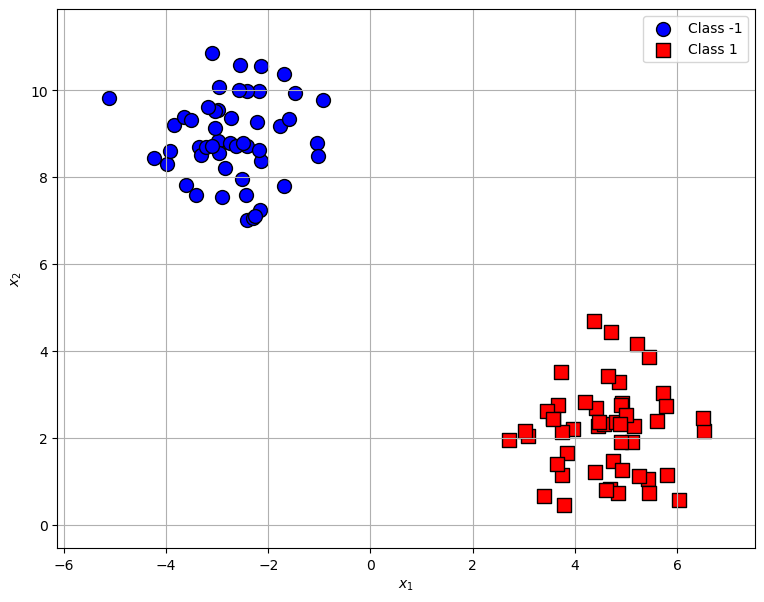

In [3]:
plt.figure(figsize=(9, 7))
# Plot data points with improved markers
plt.scatter(X[y==0, 0], X[y==0, 1],
            color='blue', marker='o', s=100, edgecolors='k', label='Class -1')
plt.scatter(X[y==1, 0], X[y==1, 1],
            color='red', marker='s', s=100, edgecolors='k', label='Class 1')
plt.grid(True)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim(X[:,0].min()-1, X[:,0].max()+1)
plt.ylim(X[:,1].min()-1, X[:,1].max()+1)
plt.legend(loc='upper right')
plt.savefig('figs/why-margin/data.svg')
plt.show()

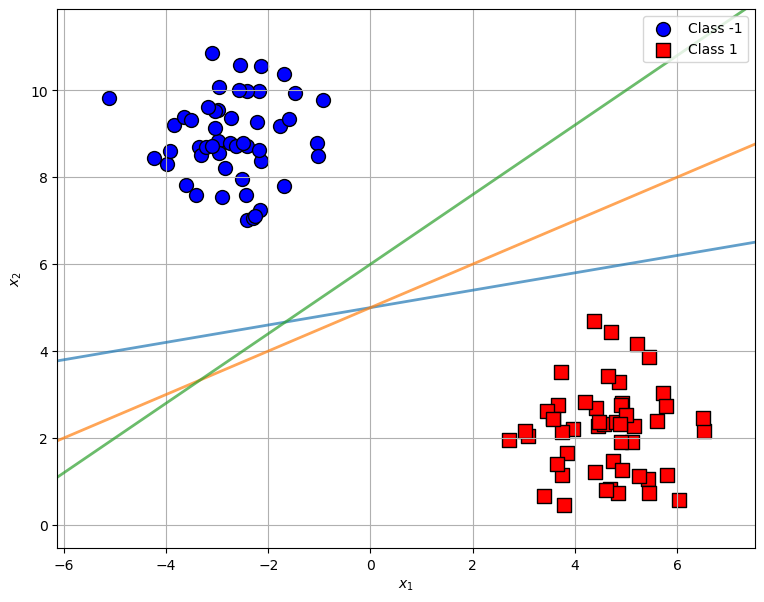

In [4]:
plt.figure(figsize=(9, 7))

plt.scatter(X[y==0, 0], X[y==0, 1],
            color='blue', marker='o', s=100, edgecolors='k', label='Class -1')
plt.scatter(X[y==1, 0], X[y==1, 1],
            color='red', marker='s', s=100, edgecolors='k', label='Class 1')

plt.grid(True)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim(X[:,0].min()-1, X[:,0].max()+1)
plt.ylim(X[:,1].min()-1, X[:,1].max()+1)
plt.legend(loc='upper right')

x_vals = np.linspace(X[:,0].min()-1, X[:,0].max()+1, 100)

# Plotting lines with different slopes and intercepts
slopes = [0.2, 0.5, 0.8]
intercepts = [5, 5, 6]

for m, b in zip(slopes, intercepts):
    y_vals = m * x_vals + b
    plt.plot(x_vals, y_vals, linewidth=2, alpha=0.7)

plt.savefig('figs/why-margin/many_lines.svg')
plt.show()

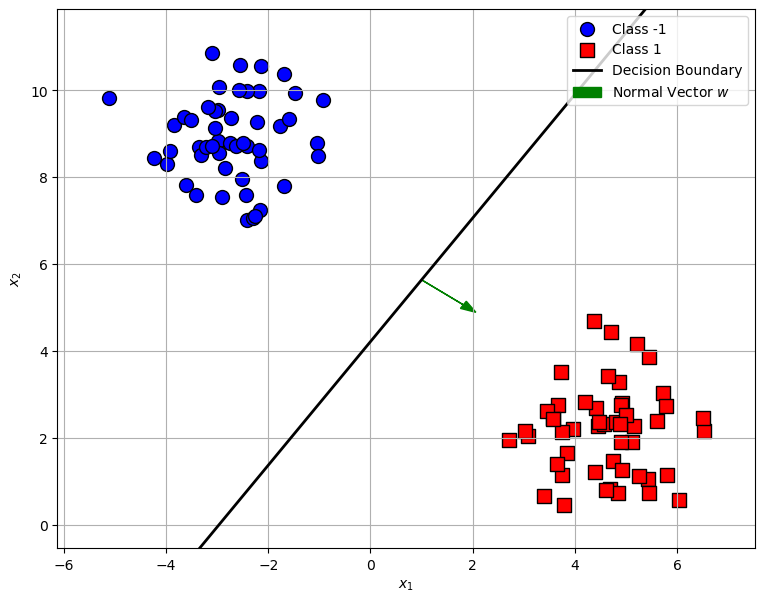

In [5]:
# Train a linear SVM with a high C-value for hard-margin–like behavior
clf = svm.SVC(kernel='linear', C=1000, random_state=random_state)
clf.fit(X, y)

# Extract the hyperplane parameters: decision boundary: w.T x + b = 0
w = clf.coef_[0]          # normal vector
b = clf.intercept_[0]
x0 = 1.0
y0 = -(w[0]/w[1]) * x0 - b / w[1]
w_unit = w / np.linalg.norm(w)

x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
xx = np.linspace(x_min, x_max, 200)
yy = -(w[0]/w[1]) * xx - b / w[1]


plt.figure(figsize=(9, 7))
# Plot data points with improved markers
plt.scatter(X[y==0, 0], X[y==0, 1],
            color='blue', marker='o', s=100, edgecolors='k', label='Class -1')
plt.scatter(X[y==1, 0], X[y==1, 1],
            color='red', marker='s', s=100, edgecolors='k', label='Class 1')
plt.plot(xx, yy, 'k-', linewidth=2, label='Decision Boundary')
plt.arrow(x0, y0,
          w_unit[0], w_unit[1],
          head_width=0.2, head_length=0.3,
          fc='green', ec='green',
          label='Normal Vector $w$')
plt.grid(True)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim(X[:,0].min()-1, X[:,0].max()+1)
plt.ylim(X[:,1].min()-1, X[:,1].max()+1)
plt.legend(loc='upper right')
plt.savefig('figs/why-margin/decision_boundary.png', dpi=300)
plt.show()

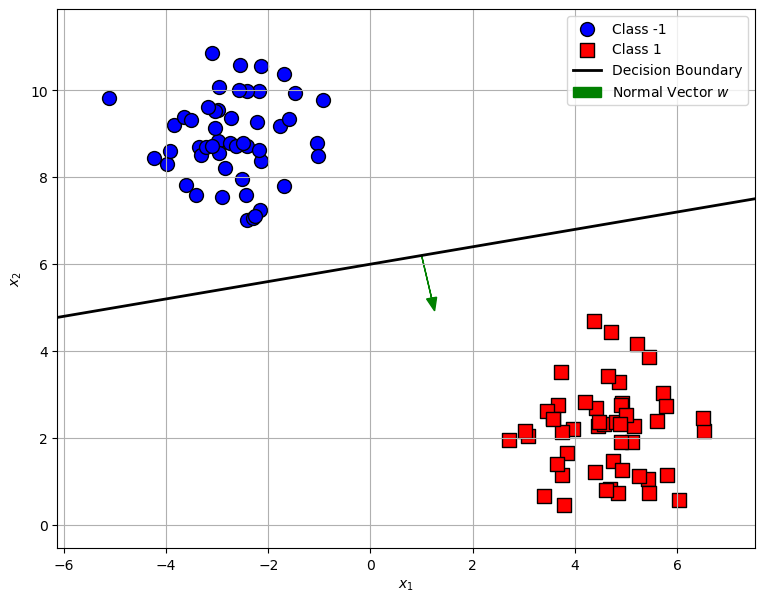

In [6]:

yy1 = 0.2* xx + 6
w = np.array([0.2, -1.0])  # Normal vector
w_unit = w / np.linalg.norm(w)  # Normalize it for plotting
x0 = 1.0
y0 = 0.2 * x0 + 6

plt.figure(figsize=(9, 7))
# Plot data points with improved markers
plt.scatter(X[y==0, 0], X[y==0, 1],
            color='blue', marker='o', s=100, edgecolors='k', label='Class -1')
plt.scatter(X[y==1, 0], X[y==1, 1],
            color='red', marker='s', s=100, edgecolors='k', label='Class 1')
plt.plot(xx, yy1, 'k-', linewidth=2, label='Decision Boundary')
plt.arrow(x0, y0,
          w_unit[0], w_unit[1],
          head_width=0.2, head_length=0.3,
          fc='green', ec='green',
          label='Normal Vector $w$')
plt.grid(True)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim(X[:,0].min()-1, X[:,0].max()+1)
plt.ylim(X[:,1].min()-1, X[:,1].max()+1)
plt.legend(loc='upper right')
plt.savefig('figs/why-margin/decision_boundary_bad1.png', dpi=300)
plt.show()

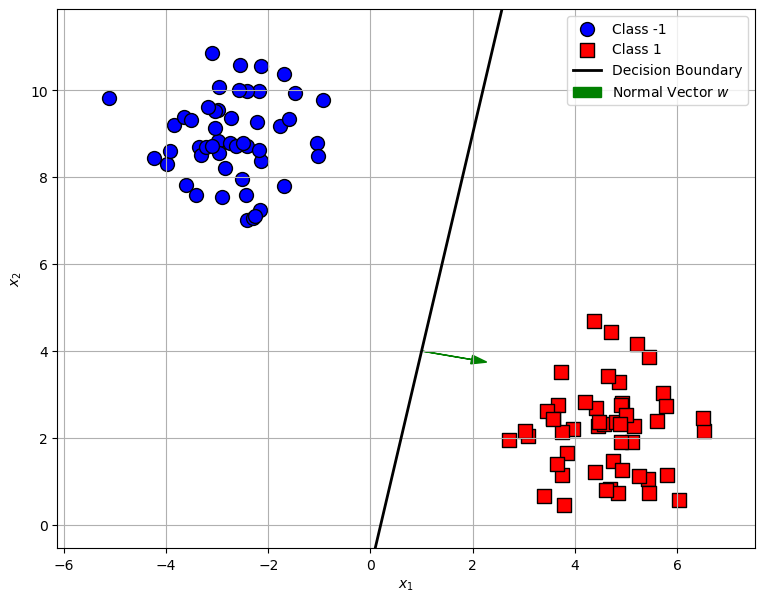

In [7]:

yy2 = 5* xx - 1
w = np.array([5, -1.0])  # Normal vector
w_unit = w / np.linalg.norm(w)  # Normalize it for plotting
x0 = 1.0
y0 = 5 * x0 - 1

plt.figure(figsize=(9, 7))
# Plot data points with improved markers
plt.scatter(X[y==0, 0], X[y==0, 1],
            color='blue', marker='o', s=100, edgecolors='k', label='Class -1')
plt.scatter(X[y==1, 0], X[y==1, 1],
            color='red', marker='s', s=100, edgecolors='k', label='Class 1')
plt.plot(xx, yy2, 'k-', linewidth=2, label='Decision Boundary')
plt.arrow(x0, y0,
          w_unit[0], w_unit[1],
          head_width=0.2, head_length=0.3,
          fc='green', ec='green',
          label='Normal Vector $w$')
plt.grid(True)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim(X[:,0].min()-1, X[:,0].max()+1)
plt.ylim(X[:,1].min()-1, X[:,1].max()+1)
plt.legend(loc='upper right')
plt.savefig('figs/why-margin/decision_boundary_bad2.png', dpi=300)
plt.show()

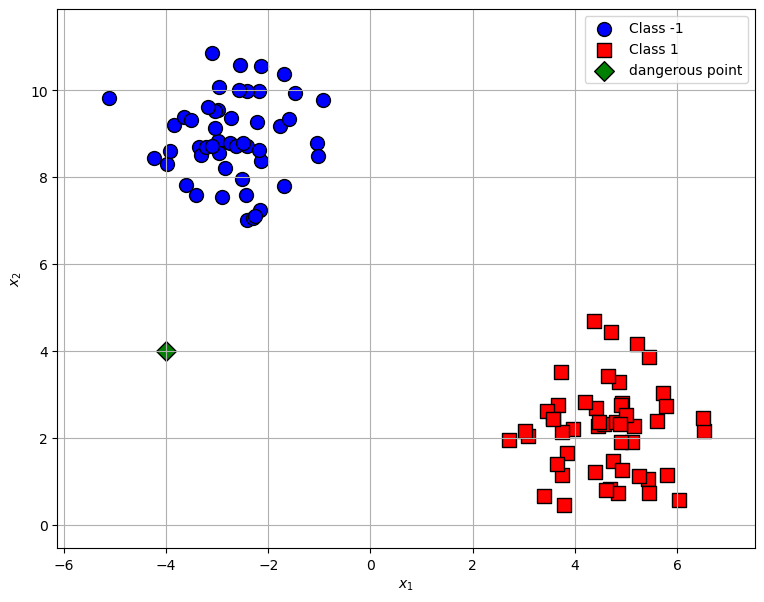

In [8]:
plt.figure(figsize=(9, 7))
# Plot data points with improved markers
plt.scatter(X[y==0, 0], X[y==0, 1],
            color='blue', marker='o', s=100, edgecolors='k', label='Class -1')
plt.scatter(X[y==1, 0], X[y==1, 1],
            color='red', marker='s', s=100, edgecolors='k', label='Class 1')

plt.scatter(dangerous_point[0, 0], dangerous_point[0, 1], color='green', marker='D', s=100, edgecolors='k', label='dangerous point')
plt.grid(True)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim(X[:,0].min()-1, X[:,0].max()+1)
plt.ylim(X[:,1].min()-1, X[:,1].max()+1)
plt.legend(loc='upper right')
plt.savefig('figs/why-margin/dangerous_point.svg')
plt.show()

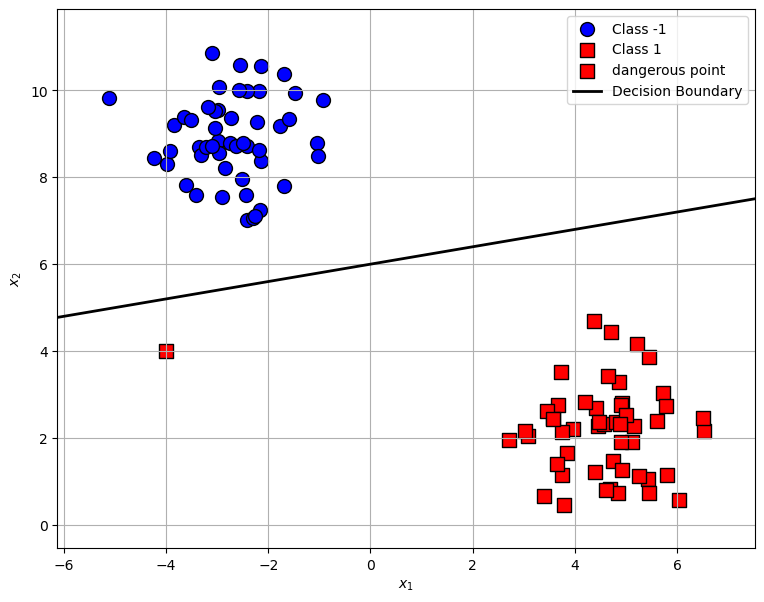

In [9]:

yy1 = 0.2* xx + 6


plt.figure(figsize=(9, 7))
# Plot data points with improved markers
plt.scatter(X[y==0, 0], X[y==0, 1],
            color='blue', marker='o', s=100, edgecolors='k', label='Class -1')
plt.scatter(X[y==1, 0], X[y==1, 1],
            color='red', marker='s', s=100, edgecolors='k', label='Class 1')

plt.scatter(dangerous_point[0, 0], dangerous_point[0, 1], color='red', marker='s', s=100, edgecolors='k', label='dangerous point')

plt.plot(xx, yy1, 'k-', linewidth=2, label='Decision Boundary')
plt.grid(True)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim(X[:,0].min()-1, X[:,0].max()+1)
plt.ylim(X[:,1].min()-1, X[:,1].max()+1)
plt.legend(loc='upper right')
plt.savefig('figs/why-margin/dangerous_point_bad1.png', dpi=300)
plt.show()


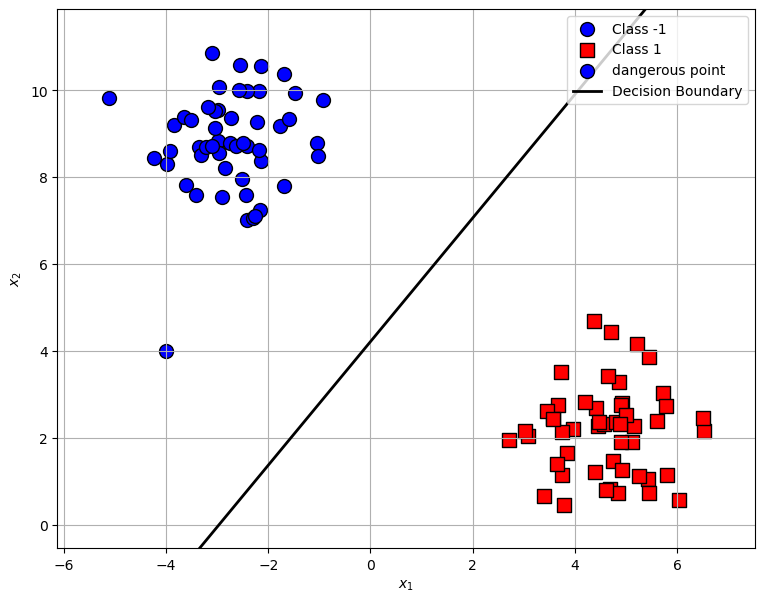

In [10]:
plt.figure(figsize=(9, 7))
# Plot data points with improved markers
plt.scatter(X[y==0, 0], X[y==0, 1],
            color='blue', marker='o', s=100, edgecolors='k', label='Class -1')
plt.scatter(X[y==1, 0], X[y==1, 1],
            color='red', marker='s', s=100, edgecolors='k', label='Class 1')
plt.scatter(dangerous_point[0, 0], dangerous_point[0, 1], color='blue', marker='o', s=100, edgecolors='k', label='dangerous point')
plt.plot(xx, yy, 'k-', linewidth=2, label='Decision Boundary')
plt.grid(True)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim(X[:,0].min()-1, X[:,0].max()+1)
plt.ylim(X[:,1].min()-1, X[:,1].max()+1)
plt.legend(loc='upper right')
plt.savefig('figs/why-margin/dangerous_point_good.png', dpi=300)
plt.show()

w: [ 0.24748994 -0.17407192] b: 0.7341550476191019 margin (γ): 3.304953578864356


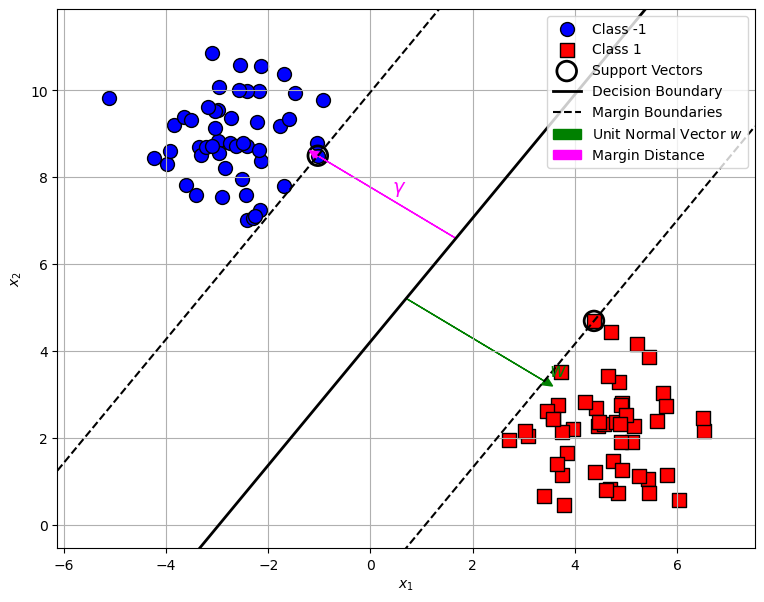

In [11]:


# 2. Train a linear SVM with a high C-value for hard-margin–like behavior
clf = svm.SVC(kernel='linear', C=1000, random_state=random_state)
clf.fit(X, y)

# Extract the hyperplane parameters: decision boundary: w.T x + b = 0
w = clf.coef_[0]          # normal vector
b = clf.intercept_[0]
margin = 1 / np.linalg.norm(w)  # geometric margin
print("w:", w, "b:", b, "margin (γ):", margin)

# 3. Compute the decision boundary and margin lines:
#    For the line w[0]*x1 + w[1]*x2 + b = 0, solve for x2: x2 = -(w[0]/w[1])*x - b/w[1]
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
xx = np.linspace(x_min, x_max, 200)
yy = -(w[0]/w[1]) * xx - b / w[1]

# Margin boundaries are given by w.T*x + b = ±1
yy_plus  = -(w[0]/w[1]) * xx - (b - 1) / w[1]
yy_minus = -(w[0]/w[1]) * xx - (b + 1) / w[1]

# 4. Create the plot
plt.figure(figsize=(9,7))

# Use different markers for different classes:
# Let's plot class 0 with circles and class 1 with triangles.
plt.scatter(X[y==0, 0], X[y==0, 1],
            color='blue', marker='o', s=100, edgecolors='k', label='Class -1')
plt.scatter(X[y==1, 0], X[y==1, 1],
            color='red', marker='s', s=100, edgecolors='k', label='Class 1')

# Highlight the support vectors
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1],
            s=200, facecolors='none', edgecolors='black', linewidths=2, label='Support Vectors')

# Plot the decision boundary (hyperplane) and margin boundaries
plt.plot(xx, yy, 'k-', linewidth=2, label='Decision Boundary')
plt.plot(xx, yy_plus, 'k--', linewidth=1.5, label='Margin Boundaries')
plt.plot(xx, yy_minus, 'k--', linewidth=1.5)

# 5. Plot the unit-normal vector w:
#    Choose a point on the decision boundary. For example, the midpoint of the plot in x.
x0 = np.mean([x_min, x_max])
y0 = -(w[0]/w[1]) * x0 - b / w[1]

# The unit normal vector is w normalized.
w_norm = w / np.linalg.norm(w)

# Draw an arrow for the normal vector starting from (x0, y0) and of length equal to the margin.
plt.arrow(x0, y0, w_norm[0]*margin, w_norm[1]*margin,
          head_width=0.2, head_length=0.2, fc='green', ec='green', label='Unit Normal Vector $w$')
plt.text(x0 + w_norm[0]*margin + 0.1, y0 + w_norm[1]*margin + 0.1, r'$w$', color='green', fontsize=14)

# 6. Plot an arrow indicating the margin distance (γ):
#    Choose one support vector and compute its projection onto the decision boundary.
sv = clf.support_vectors_[0]
foot = sv - ((np.dot(w, sv) + b) / np.dot(w, w)) * w
# Draw arrow from the foot (on the hyperplane) to the support vector.
plt.arrow(foot[0], foot[1], sv[0]-foot[0], sv[1]-foot[1],
          head_width=0.2, head_length=0.2, fc='magenta', ec='magenta', label='Margin Distance')
mid_pt = (foot + sv) / 2
plt.text(mid_pt[0] + 0.1, mid_pt[1] + 0.1, r'$\gamma$', color='magenta', fontsize=14)

# Set labels and title
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim(x_min, x_max)
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.grid(True)
plt.savefig('figs/why-margin/svm_margin.svg')
plt.show()